In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/bestbuy/notebooks/ashish


In [2]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.version

sys.path.append("../../")

from src.ad_hmm import sku_predict
from src.utils import *

In [3]:
%load_ext autoreload 
%autoreload 2

### Group on categories

In [5]:
train_test = pd.read_csv("../../data/train_validation_marker.csv")
train_test["SALES_DATE"] = pd.to_datetime(train_test["SALES_DATE"])
print (train_test.shape)

(846632, 15)


In [6]:
#clean train/test
train = train_test[(train_test.validation==False) & (train_test.validation_clean==True)]
validation = train_test[(train_test.validation==True) & (train_test.validation_clean==True)]
train.shape,validation.shape

((797490, 15), (3815, 15))

In [7]:
train.columns

Index(['Encoded_SKU_ID', 'SALES_DATE', 'SUBCLASS_NAME', 'CLASS_NAME',
       'ML_NAME', 'CATEGORY_NAME', 'RETAIL_PRICE', 'PROMO_PRICE',
       'COMPETITOR_PRICE', 'Inventory', 'DAILY_UNITS', 'max_SALES_DATE',
       'delta_days', 'validation', 'validation_clean'],
      dtype='object')

In [9]:
class_grp = train.groupby(['CLASS_NAME'])["Encoded_SKU_ID"].apply(list)
class_grp.head()

CLASS_NAME
BUILT IN COOKING        [22, 28, 55, 58, 58, 93, 55, 22, 125, 55, 130,...
BUILT-IN REFRIGERATR    [137, 137, 188, 137, 137, 137, 188, 188, 188, ...
CAMERAS - ILC           [31, 95, 95, 224, 230, 230, 230, 224, 230, 224...
CAMERAS - P&S           [24, 27, 153, 304, 153, 24, 24, 153, 153, 27, ...
CAR ELECTRONICS         [82, 118, 208, 221, 82, 331, 118, 348, 82, 82,...
Name: Encoded_SKU_ID, dtype: object

### Plot SKUs of one class together

/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


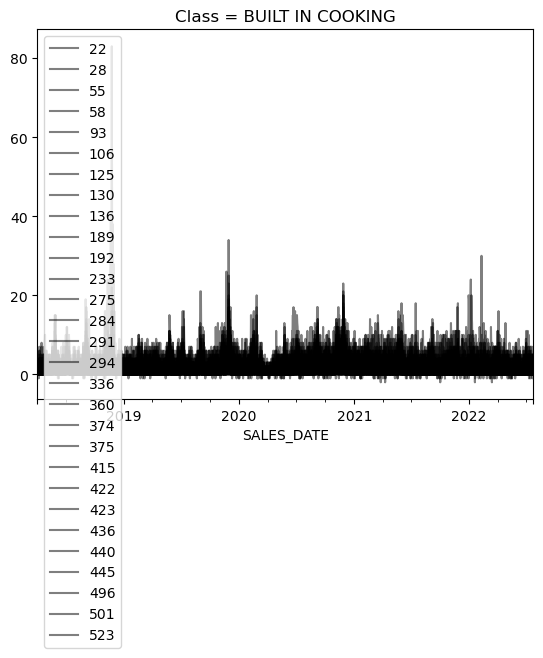

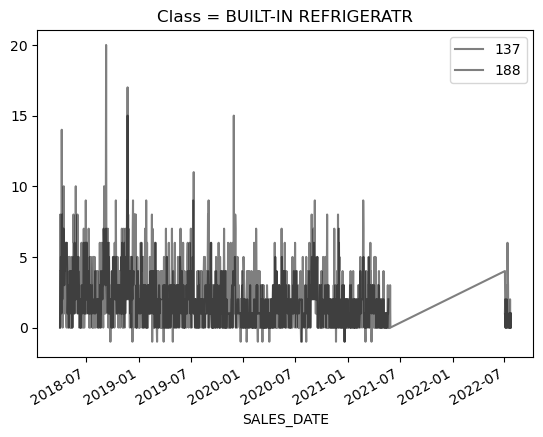

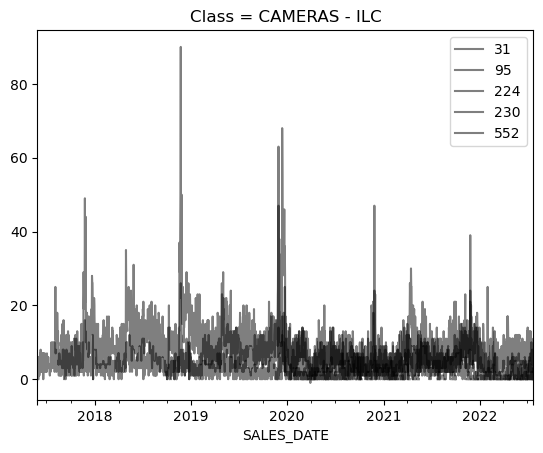

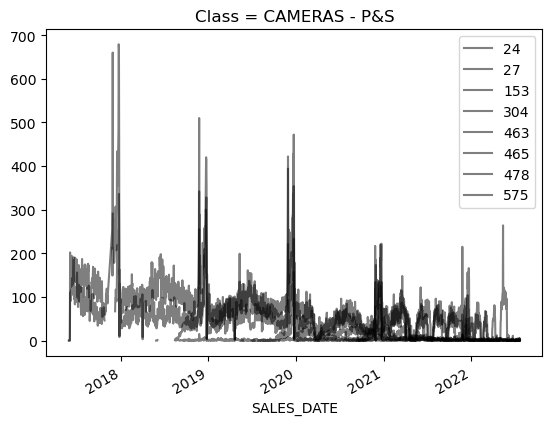

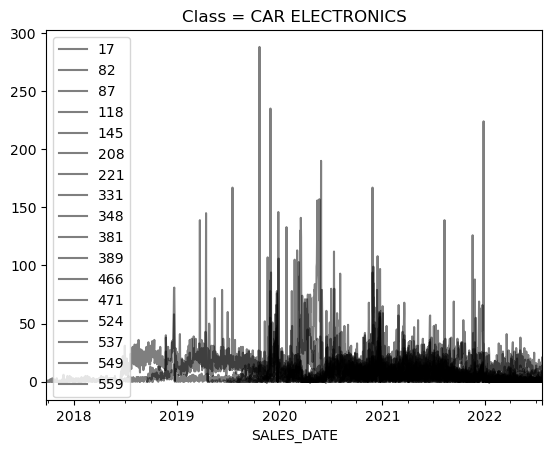

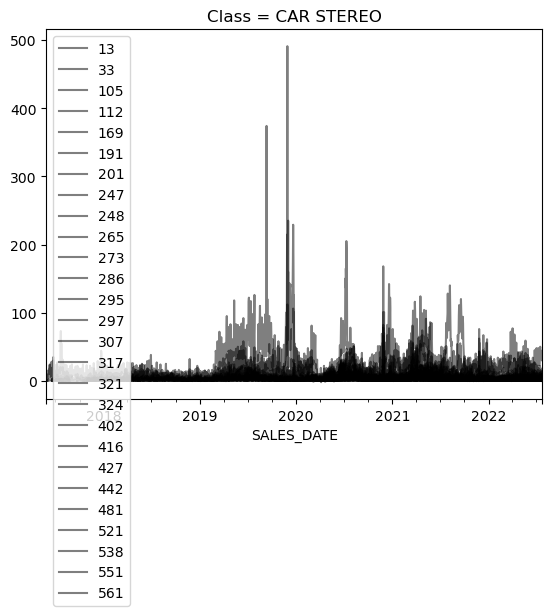

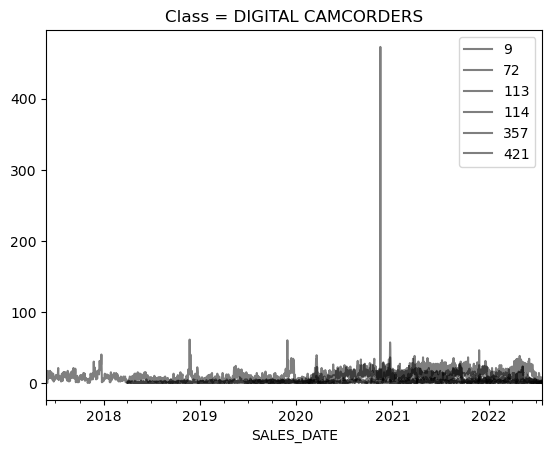

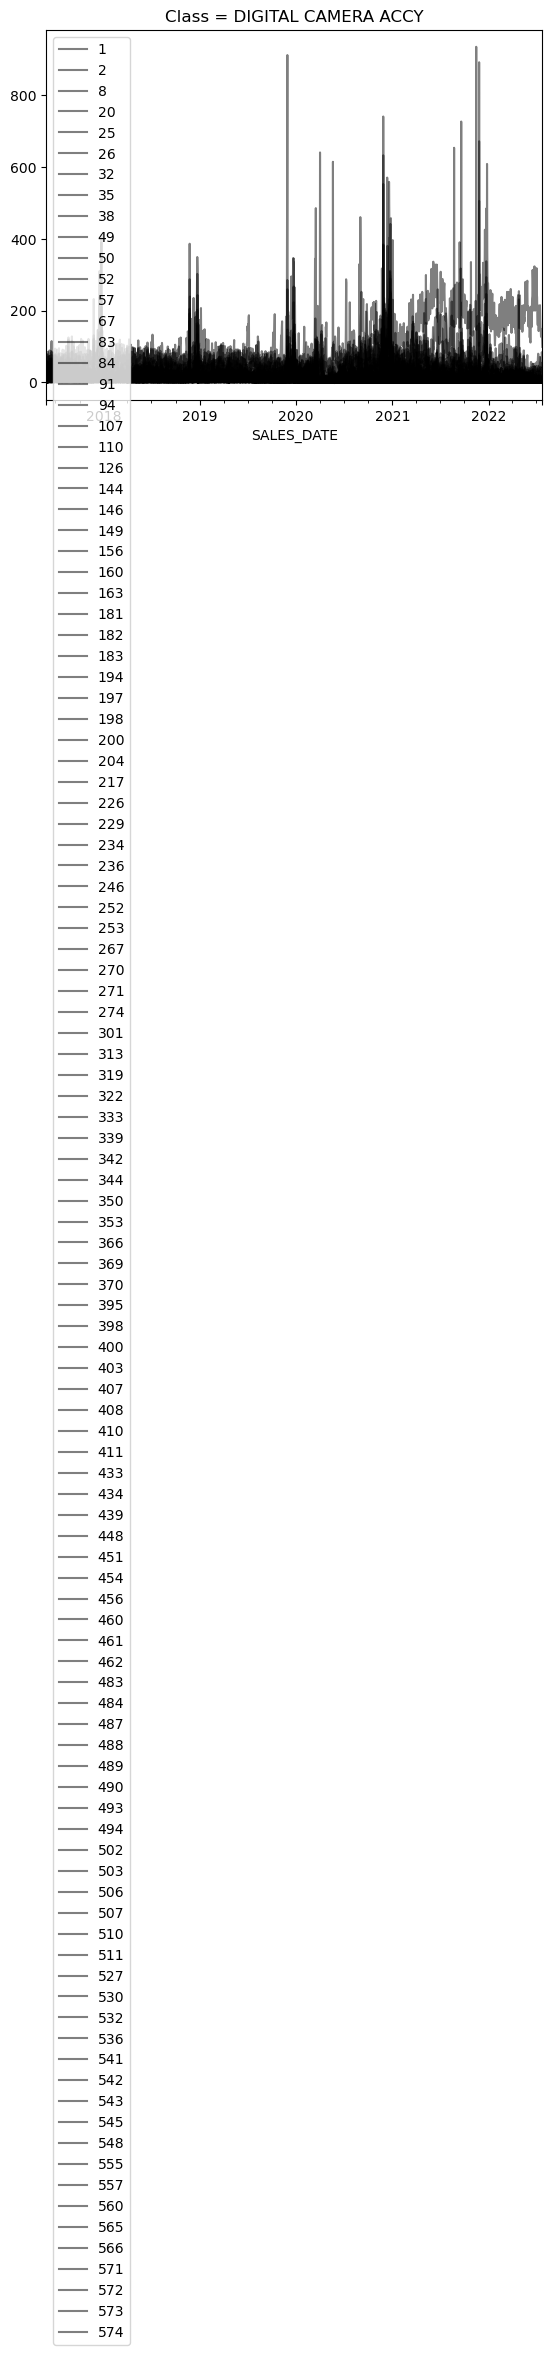

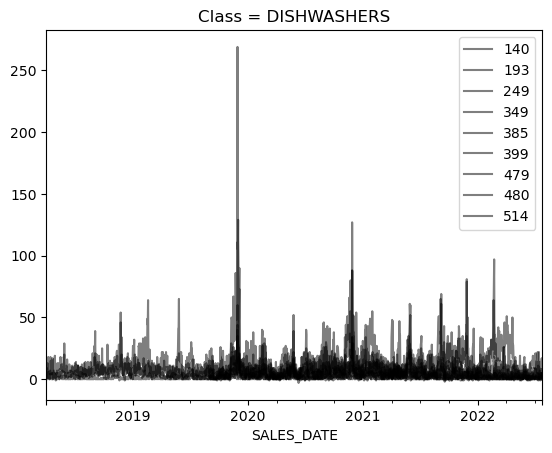

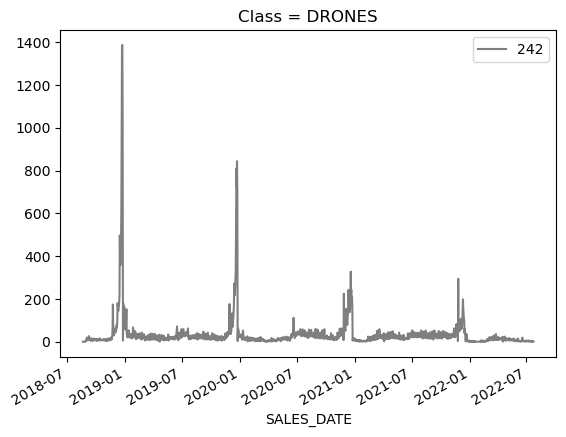

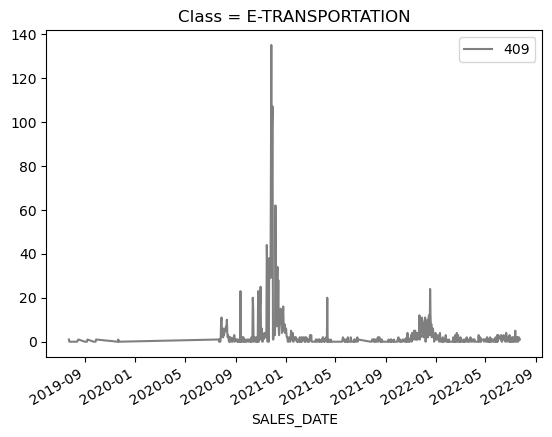

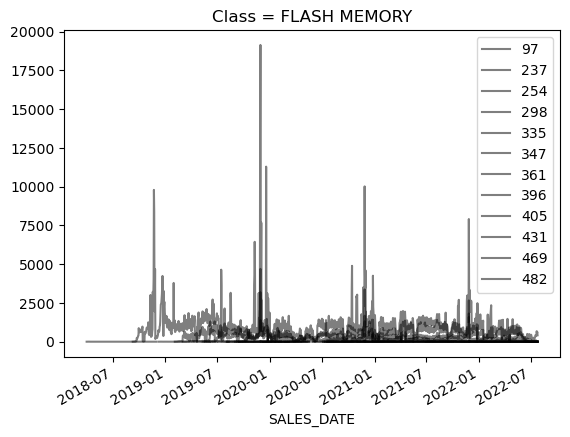

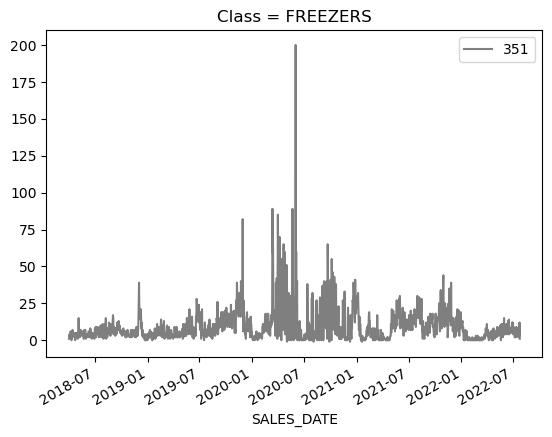

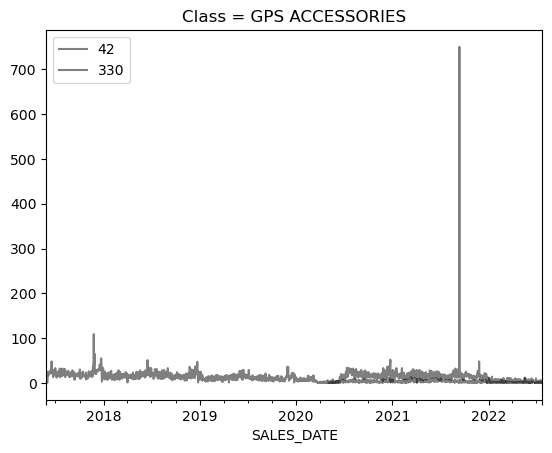

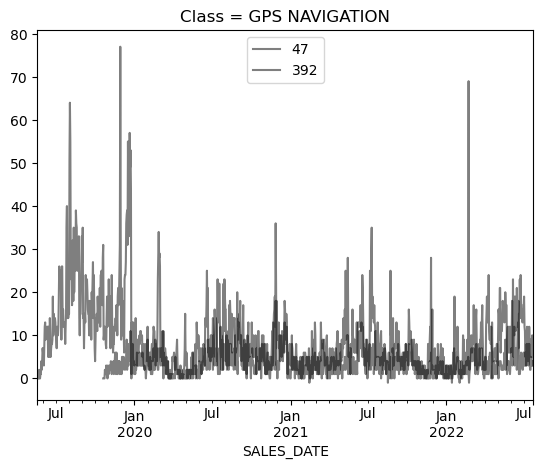

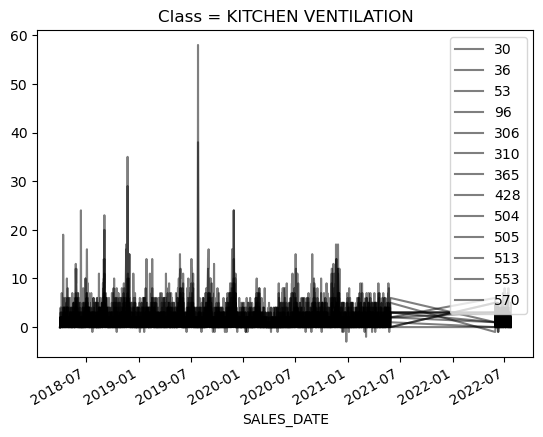

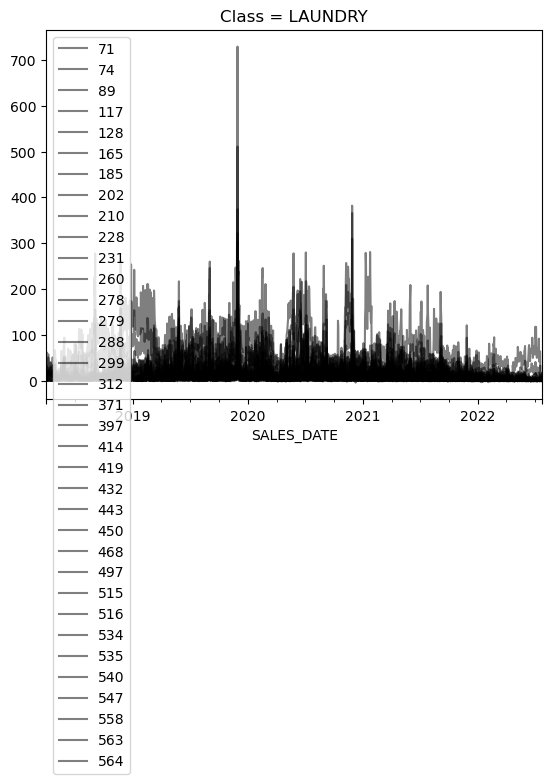

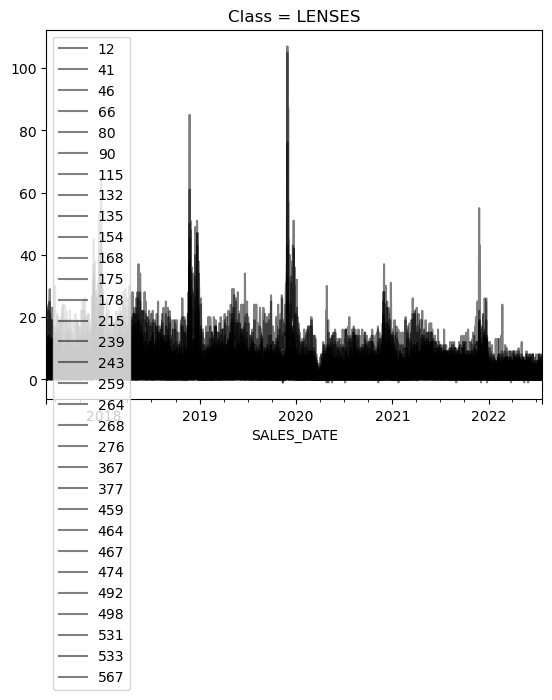

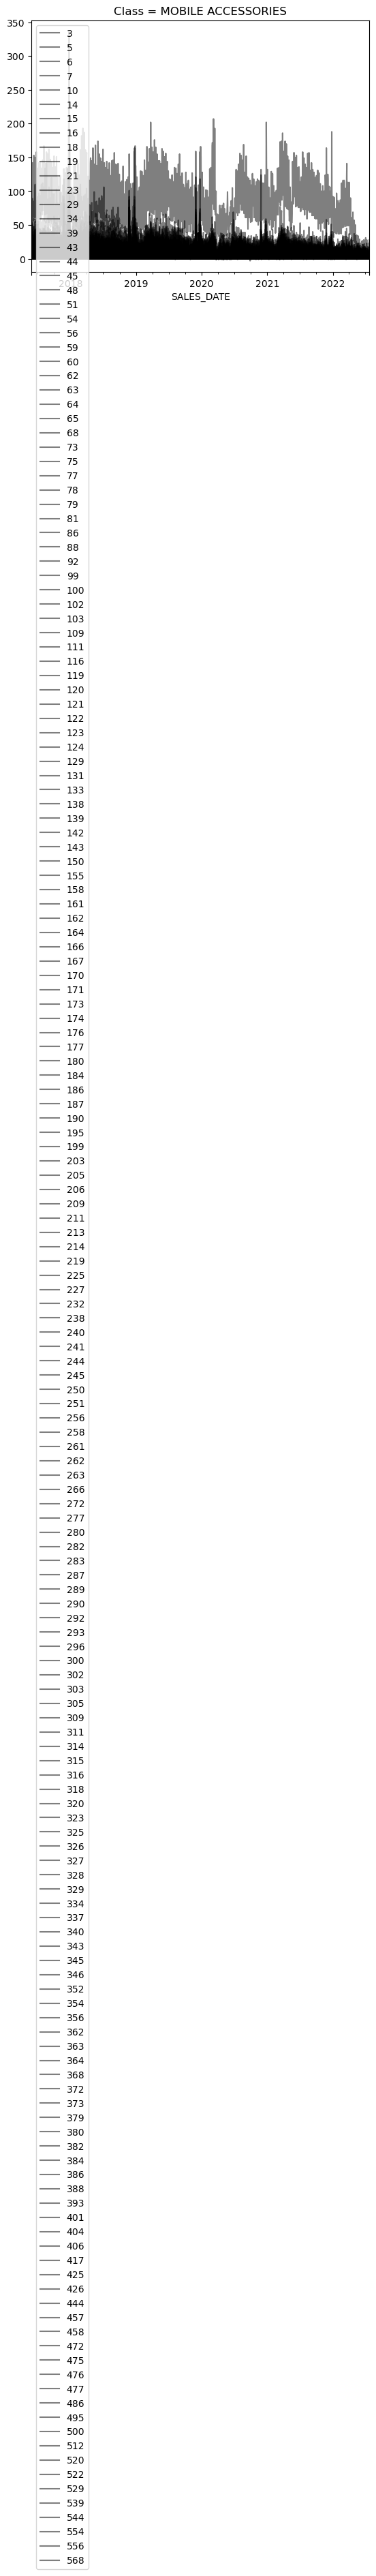

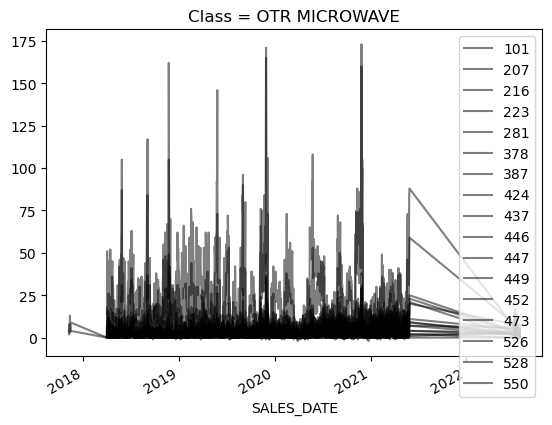

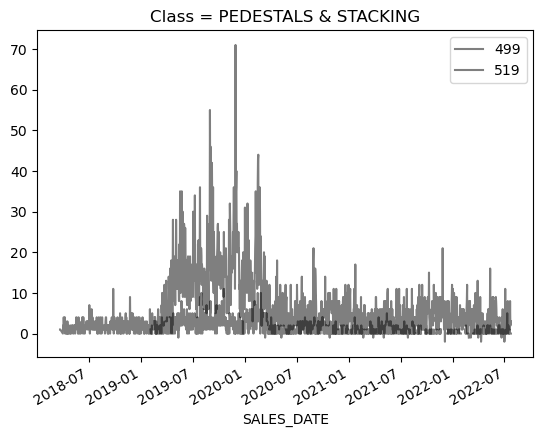

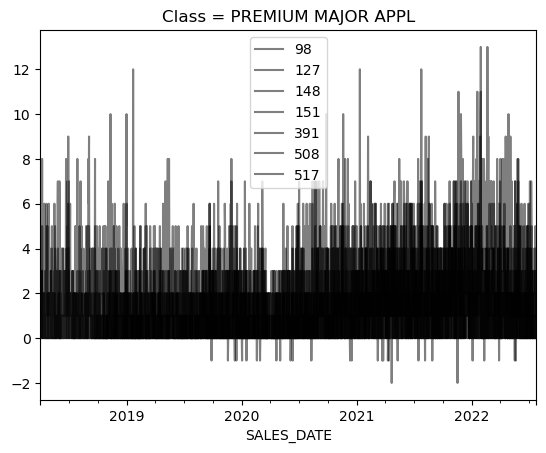

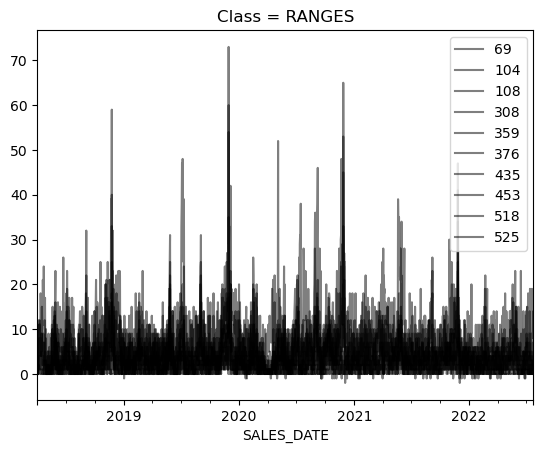

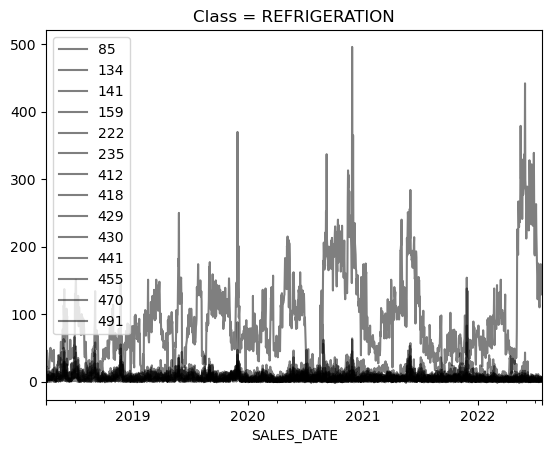

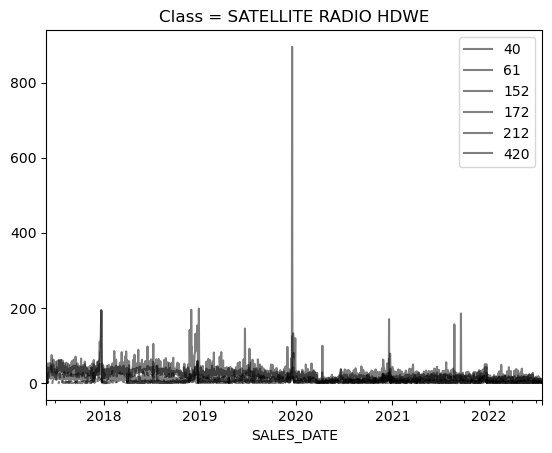

In [26]:
for class_name,sku_list in zip(class_grp.index,class_grp):
    train_subset = train.loc[train.Encoded_SKU_ID.isin(sku_list)]
    train_subset_pivot = train_subset.pivot(index='SALES_DATE', columns='Encoded_SKU_ID', values='DAILY_UNITS')
    train_subset_pivot.plot(alpha=0.5,color="black",label="")
    plt.title(f"Class = {class_name}")
    plt.legend()